# Problem Statement - 

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


# Inspiration / Label - 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

# Importing all the neccessary libraries - 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge 
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset - 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

# Understanding the dataset - 

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.set_index('Unnamed: 0', inplace = True)

In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Observations from the above output is as follows: 
    
    1. The dataset do have the 18249 rows and 14 columns in total. 
    2. In total, we have 13 variables, that are - 'Date', 'AveragePrice', 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'.
    3. Among them Average Price and Region are dependent variables or the target variables and rest of the variables are independent on their own. 
    4. We do have certain variables like Date, type, and region in object format. We will look forward whether they do have significance with the target varaibles - if they do have then we will encode them individually otherwise they can be removed - it will not make much of the difference. 

In [7]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [8]:
df.drop('Date', inplace = True, axis = 1)

In [9]:
df.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,,,,,,,,,,,,
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [10]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [11]:
### We can change the regions into different labels starting from 1 to ... with label enocder. 
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [12]:
df['type'] = le.fit_transform(df['type'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.7 MB


Now each variable is in integer or in float data type, which makes data ready to go to anaylyze and train the model. 

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


Observations :  
    
    1. In  total, we have 18249 values in all variables. 
    2. The standard devaitaion of certain variablels like total bags, small bags, Xlarge bags, and region is more than the threshold. It implies data do have outliers avilable in it. 
    3. Data is also skewed, it is not balanced. 

# Checking the null values if they exsist - 

In [15]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

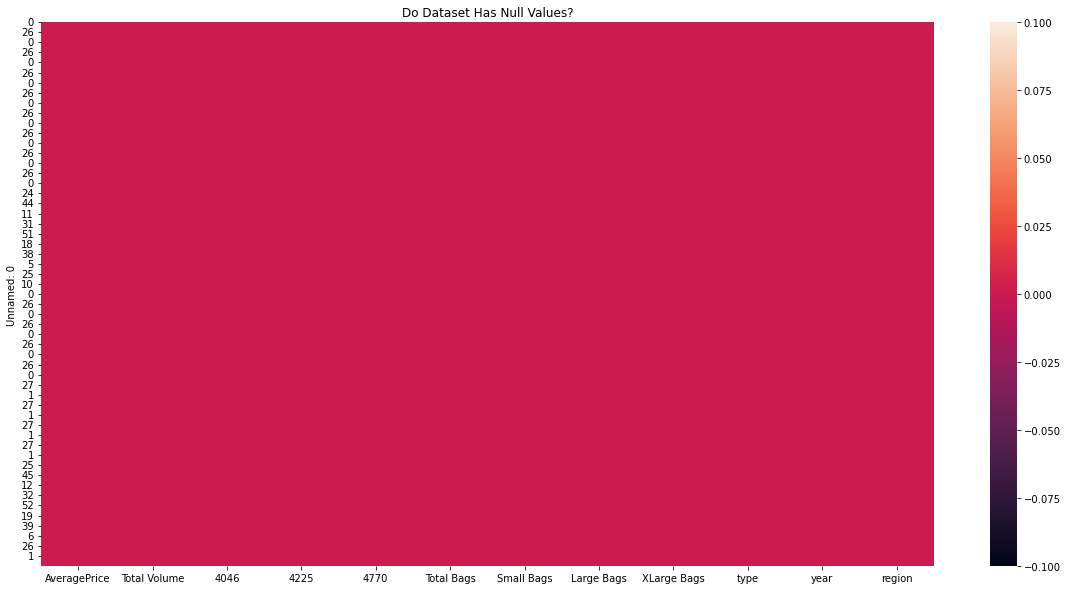

In [16]:
plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title('Do Dataset Has Null Values?')
plt.show()

There are no null or missing values exsisting in the dataset. 

# Checking the skewness - 

In [17]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

<AxesSubplot:ylabel='Density'>

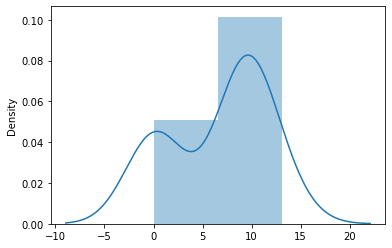

In [18]:
sns.distplot(df.skew())

The data is rightly skewed in majority of the varaibles. It needs to be corrected further. 

# Looking at the correlation varaibles have with respect to each other - 

In [19]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


<AxesSubplot:>

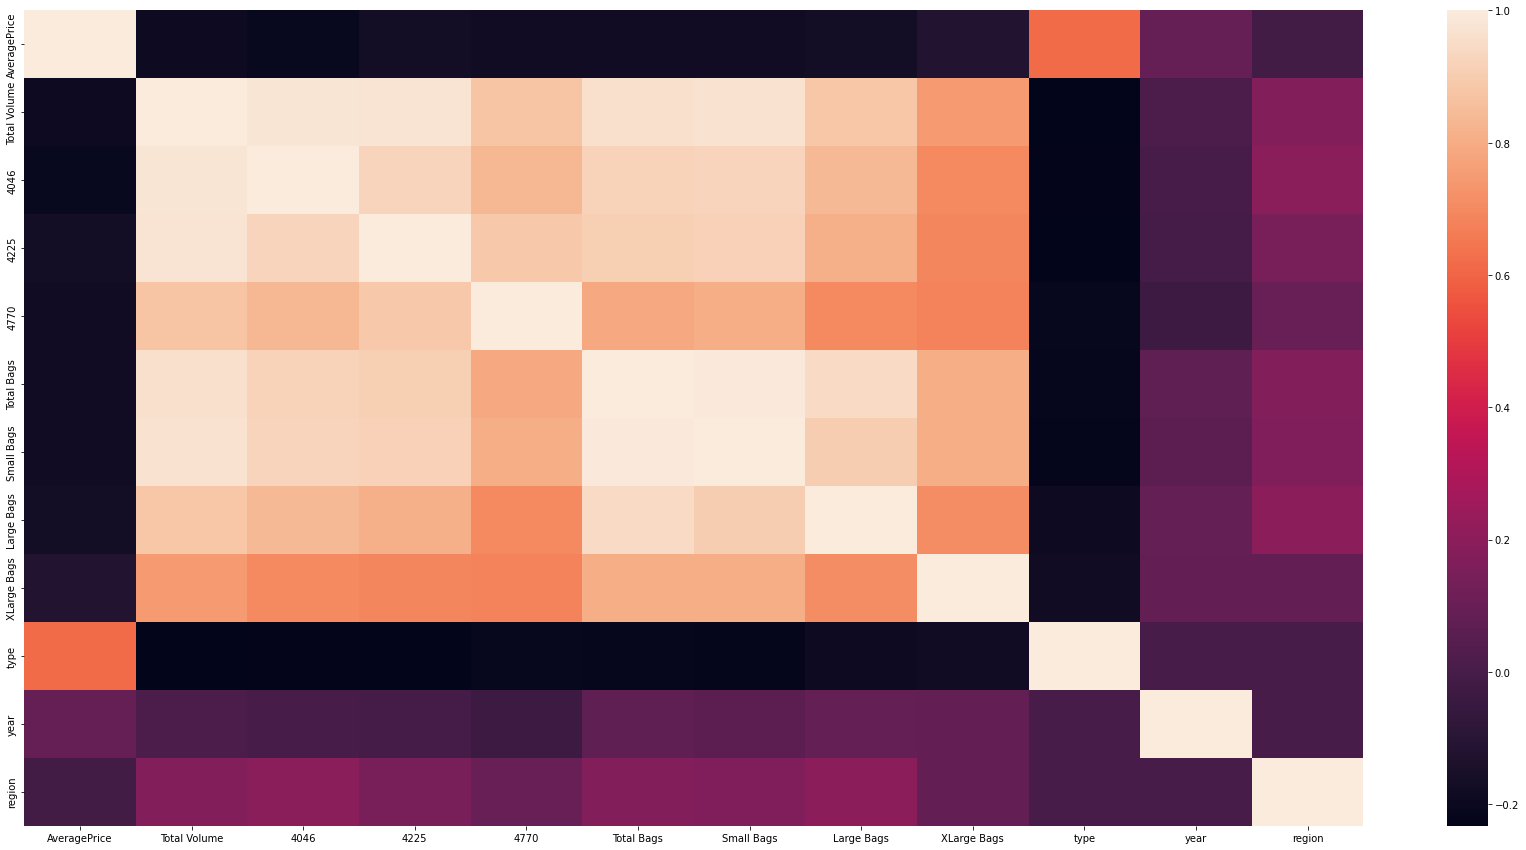

In [20]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr())

Observations: 
    
    1. Type is quite highly positively correated with the average price. Region, total volumes, and bags are negatively correlated with average price. 
    2. Rest of the variables do hold light correlation with respect to each other. 

# Performing the data visualization - 

0    9126
1    9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

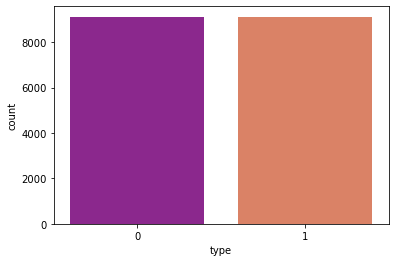

In [21]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='plasma')

Observations - 
    
    0 stands for conventional and 1 stands for the organic avacado type that people prefer. In aggregate, there is not much differnetiation in between the both. People do prefer both equavilently. 

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

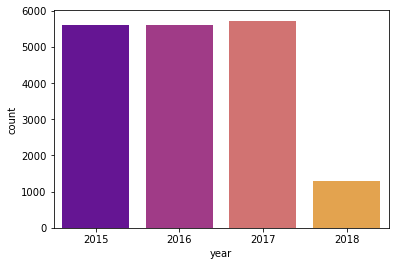

In [22]:
print(df['year'].value_counts())
sns.countplot(df['year'], palette = 'plasma')

Observation - Generally maximum avacado is sold in the year 2017 and then in 2015 and 216. Least amount of avacado is sold in the year 2018. 

<Figure size 2160x1080 with 0 Axes>

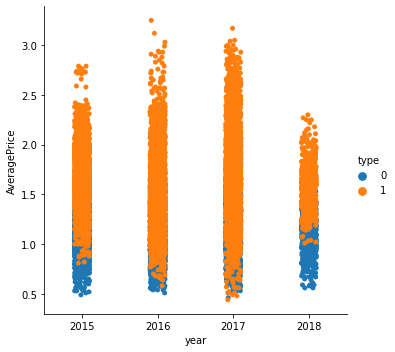

In [23]:
plt.figure(figsize=(30,15))
sns.catplot(x="year", y="AveragePrice", hue="type", data=df)
plt.show()

Observation - 

    1. In 2016, the average price is the highest in comparison to other years.
    2. Apart from the year, people generally prefer organic avacado over conventional avacados. Price differ in the same manner. 

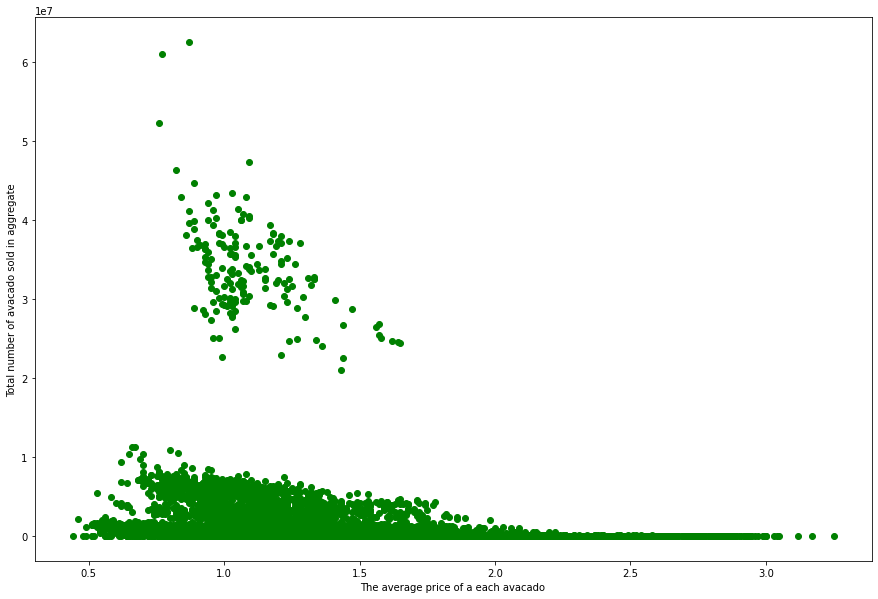

In [24]:
plt.figure(figsize=(15,10))
plt.scatter(df['AveragePrice'],df['Total Volume'],c='Green')
plt.xlabel('The average price of a each avacado')
plt.ylabel('Total number of avacado sold in aggregate')
plt.show()

The average price ranges from 0.8 to 2.0 maximum nuumber of times, we do have outliers in the dataset available as well. 

<Figure size 2160x1080 with 0 Axes>

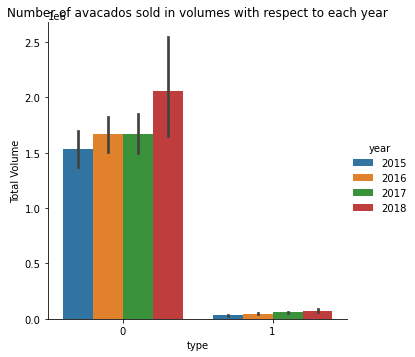

In [25]:
plt.figure(figsize=(30,15))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df)
plt.title("Number of avacados sold in volumes with respect to each year")
plt.show()

In terms of total volume, conventional avacados are prefer more. It is at its mamximum in the year 2018. There is a massivee difference in the volumes of organic and conventionanl avacados available. 

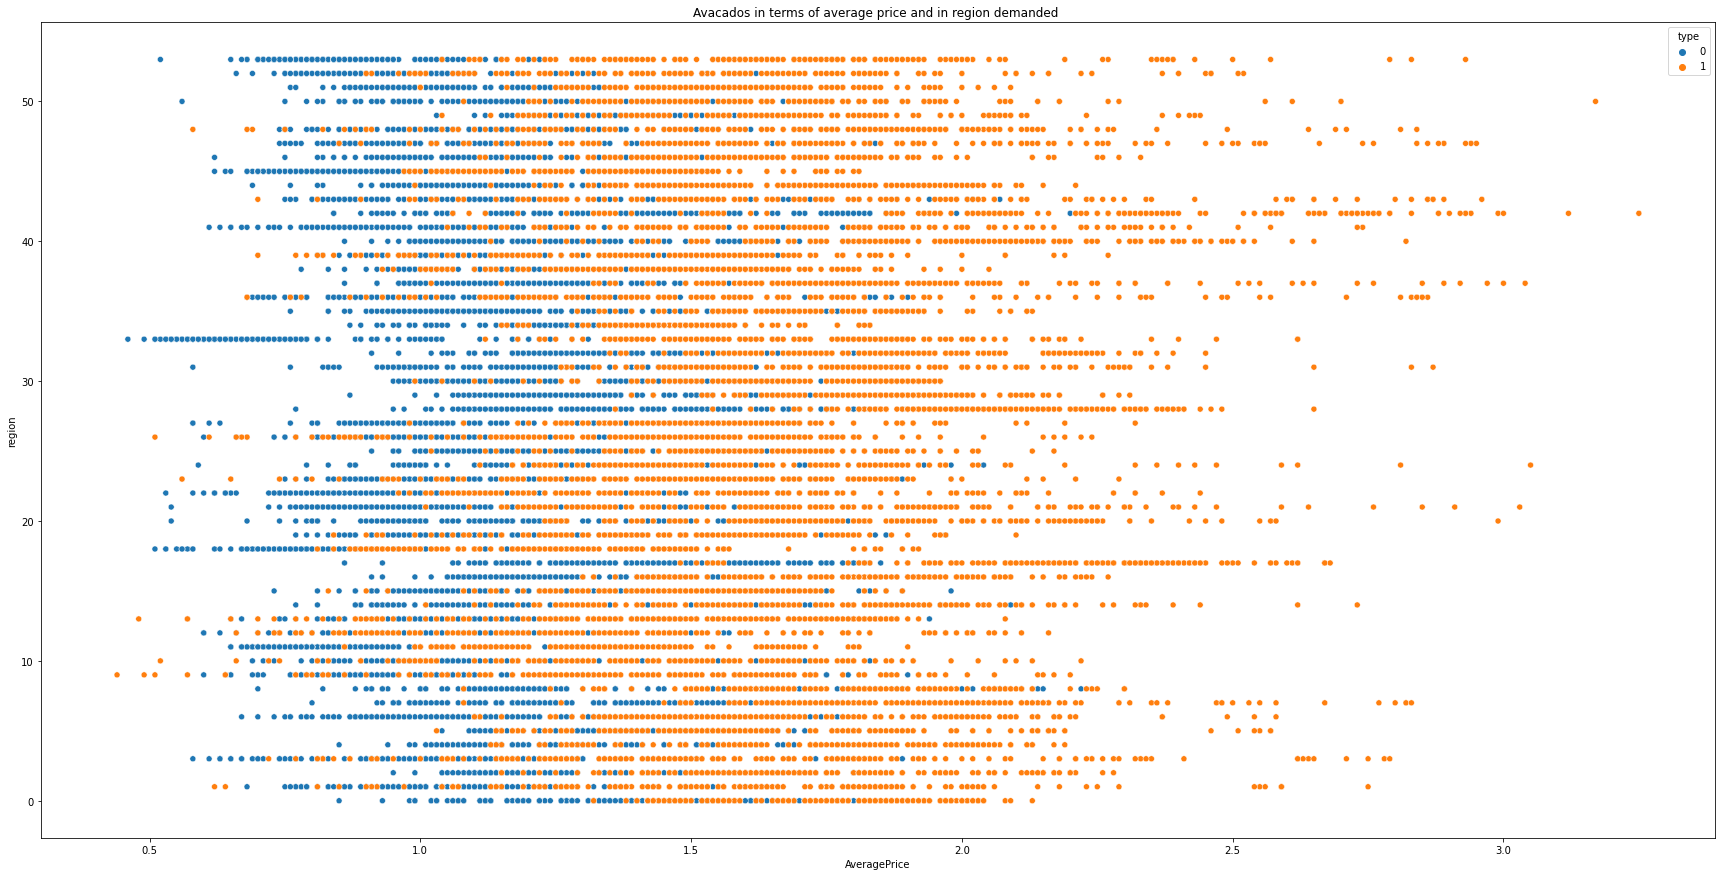

In [26]:
plt.figure(figsize=(30,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df)
plt.title("Avacados in terms of average price and in region demanded ")
plt.show()

It is quite showed that average price of all region of organic avacnodes is always higher than that of conventional.

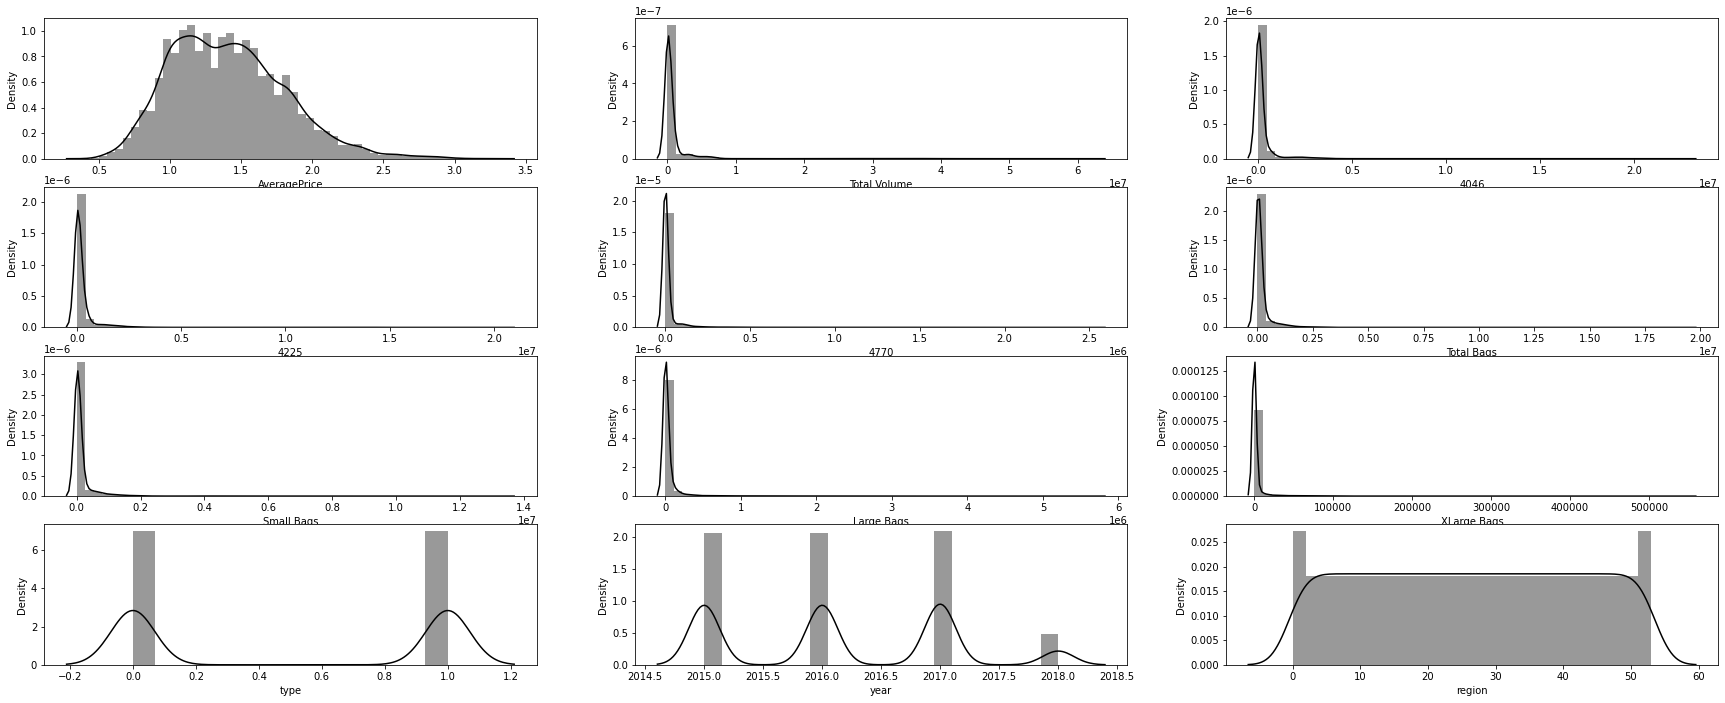

In [27]:
plt.figure(figsize=(30,15))
for i in enumerate(df.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='black')

The data is generally rightly skewed. The skewness which is over -0.5 and +0.5 will be treated now. 

In [28]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform
df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]=power_transform(df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']],method='yeo-johnson')

In [30]:
df.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
dtype: float64

<AxesSubplot:ylabel='Density'>

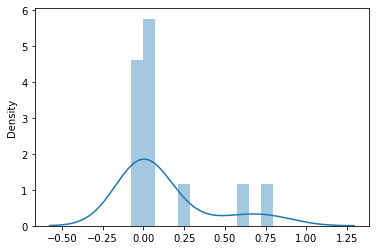

In [31]:
sns.distplot(df.skew())

Skewness is removed from the distribution now. 

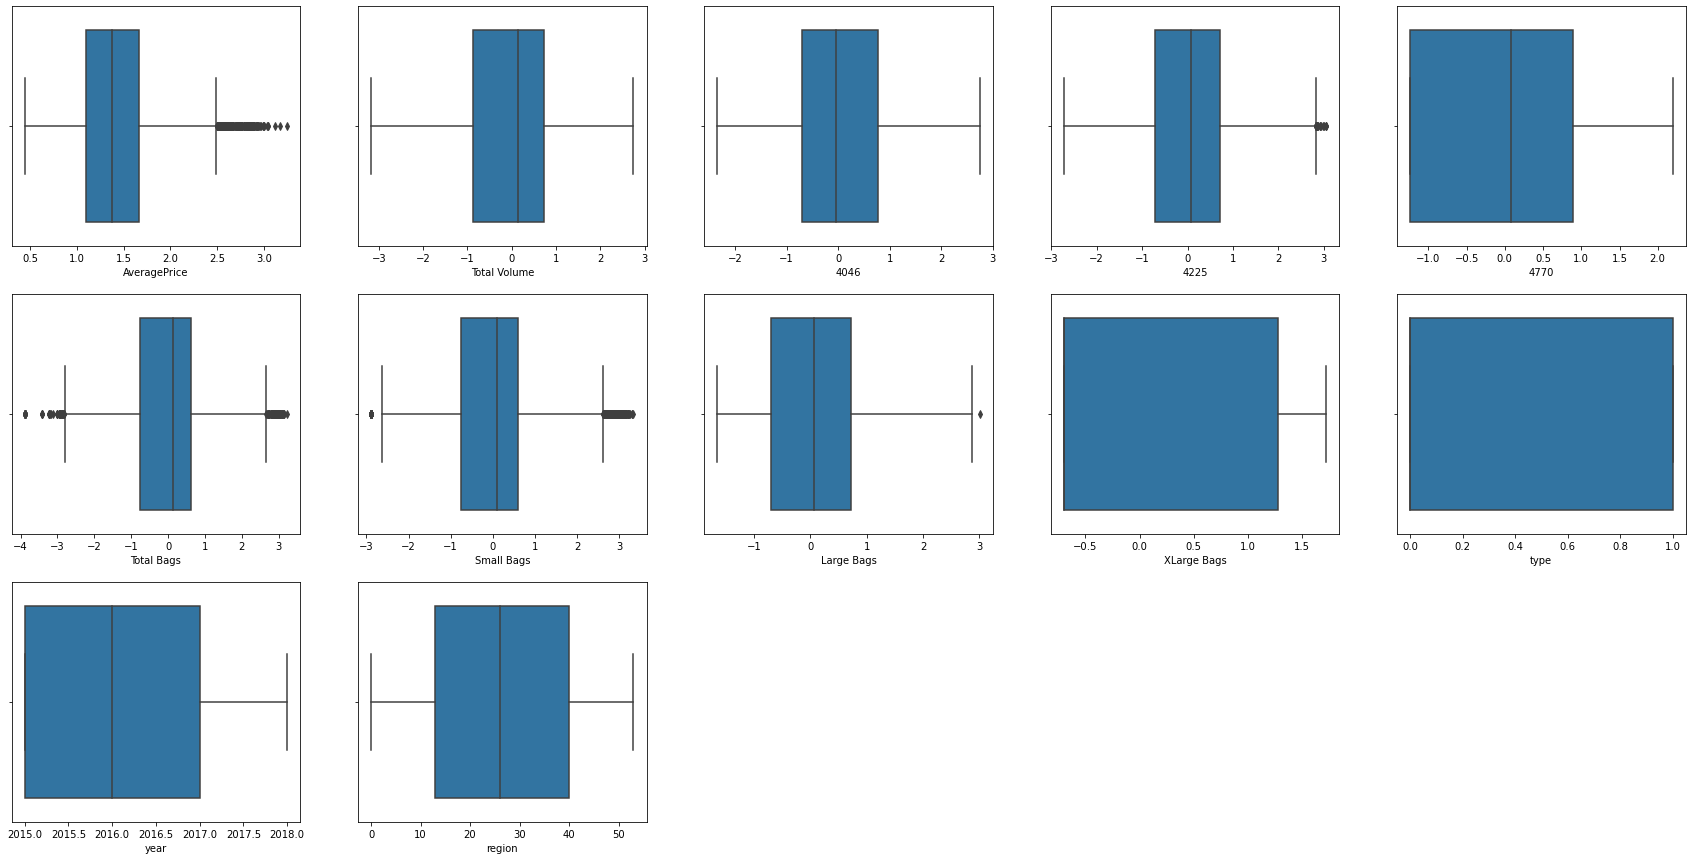

In [32]:
plt.figure(figsize=(30,15))
for i in enumerate(df):
    plt.subplot(3,5,i[0]+1)
    sns.boxplot(df[i[1]])

Outliers are available in the varaibles like average price, 4225, total bags, small bags, large bags. This needed to be corrected. Handling it now!

In [33]:
from scipy.stats import zscore 
z = np.abs(zscore(df))
print(np.where(z>3))

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
        8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
        8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
        8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
        9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
        9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
        9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11320,
       11321, 11321, 11322, 11323, 11324, 11325, 11325, 11326, 11326,
       11327, 11328, 11329, 11330, 11331, 11332, 11332, 11333, 11336,
       11338, 11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387,
       11388, 11594

In [34]:
df_new = df[(z<3).all(axis=1)]
print("New dataset shape = ", df_new.shape)
print("Old dataset shape = ", df.shape)

New dataset shape =  (18025, 12)
Old dataset shape =  (18249, 12)


In [35]:
### Replacing the dataset with outlier free  dataset. 
df = df_new

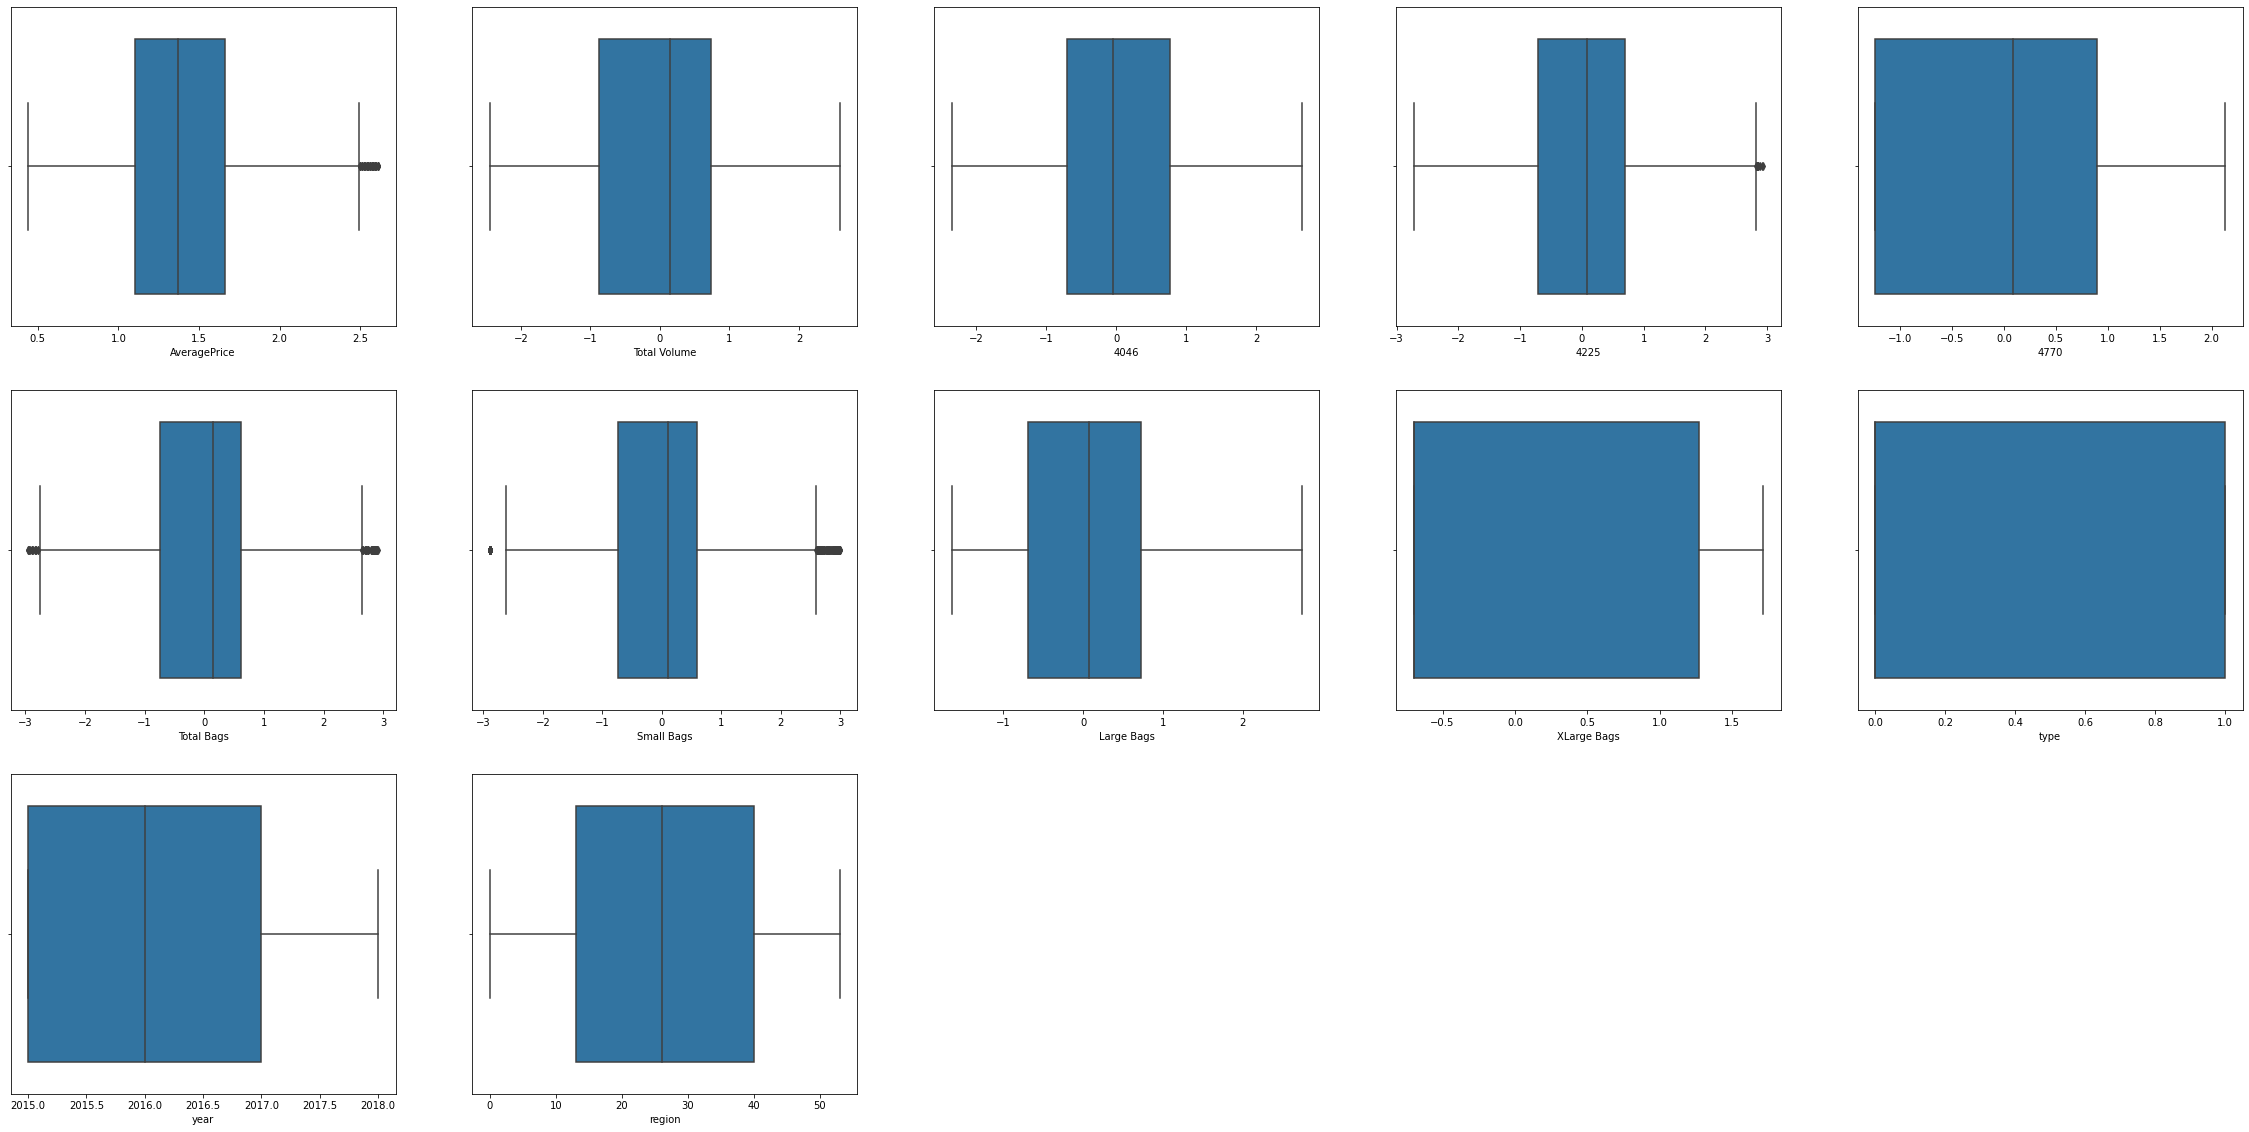

In [36]:
plt.figure(figsize=(40,20))
for i in enumerate(df):
    plt.subplot(3,5,i[0]+1)
    sns.boxplot(df[i[1]])

Observations:: Outliers are removed from the dataset now. Data is ready to go for the training period. 

# Task 1 - Finding the average price with regression.

In [37]:
## Dividing the dataset into training and testing manner. 
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('R2_score', r2_score(y_test, pred))

MAE: 0.21119245093208222
MSE: 0.07272701505957843
RMSE: 0.2696794672561825
R2_score 0.511318602206333


The model do hold the low RMSE which actaully implies it is a good fit; however the R2 score of the model is 51% only. 

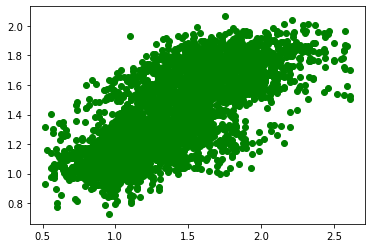

In [40]:
#Plotting the y_test vs the predictions - 
plt.scatter(x=y_test,y=pred, color = 'green')

This gives us somehow quite staright line -> It can be considered as a good model. 

In [41]:
R = Ridge()
R.fit(X_train,y_train)
print(R.score(X_train,y_train))
R_predict=R.predict(X_test)
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, R_predict)))
print('r2_score:',r2_score(R_predict,y_test))

0.5366825817791615
MSE: 0.07272611790034901
MAE: 0.21119042919763045
RMSE: 0.26967780387037604
r2_score: 0.0710717851900724


The model do hold the low RMSE which actaully implies it is a good fit; however the R2 score of the model is 7% only which is quite low. 

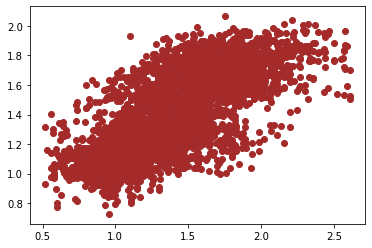

In [42]:
#Plotting the y_test vs the predictions - 
plt.scatter(x=y_test,y=pred, color = 'brown')

MAE: 0.13641608876560332
MSE: 0.04294158113730929
R2_score 0.7114586391802327
RMSE: 0.20722350527222844


Text(0, 0.5, 'Predicted Y')

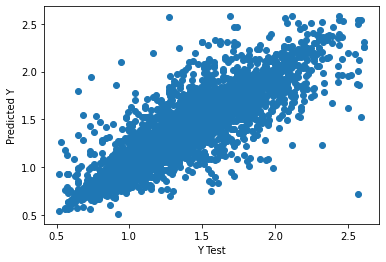

In [43]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('R2_score', r2_score(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Decison Tree Regressor model also gives out the 7% R2 score which is quite low. 

In [44]:
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('R2_score', r2_score(y_test, pred))

MAE: 0.10616834951456311
MSE: 0.022675535603328714
RMSE: 0.15058398189491706
R2_score 0.8476341642060103


With Random forest regressor, we are getting the lowest RMSE value along with this R2 score is 85% which is better than other models. This model till now is the best model. 

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

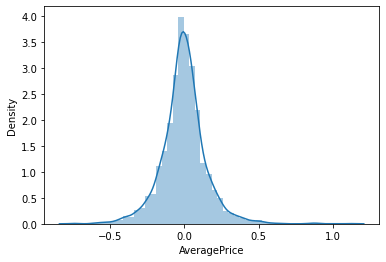

In [46]:
sns.distplot((y_test-pred))

It actually shows model is choosing the data correctly. 

In [50]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)
print(GBR.score(X_train,y_train))
GBR_PRED=GBR.predict(X_test)
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

0.6998956040517333
MSE: 0.04994126320088857
MAE: 0.16838323248661538
r2_score: 0.41416123053616805


# Performing cross validation now for the Task 1 - 

In [51]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),
             GradientBoostingRegressor()]
          
          
names = ['LR', 'R','RF','DTR','GBR']
          
for model,name in zip(models,names):
          score = rmse_cv(model,x,y)
          print("{}  : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


LR  : 0.075522, 0.026944
R  : 0.075517, 0.026939
RF  : 0.061397, 0.026301
DTR  : 0.115462, 0.043355
GBR  : 0.060265, 0.025026


Random Forest Regressor do have the minimum RMSE value, it is the best model for prediction of the average price. 

# Hyper Parameter Tuning for Task 1 - 

In [52]:
RF = RandomForestRegressor()

param ={
       'n_estimators':[100,200],
      'criterion':['mse','mae'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [53]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [56]:
RF.fit(X_train,y_train)
RF.score(X_train,y_train)
pred=RF.predict(X_test)
print("Accuracy score: ", r2_score(y_test,pred))
print("Mean Absolute Error", mean_absolute_error(y_test,pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,pred))**0.5)

Accuracy score:  0.8451107408143601
Mean Absolute Error 0.10682746185852982
Root Mean Squared Error 0.15182581782096272


In [59]:
### Saving the model now - 
import joblib
joblib.dump(rdr,'Avocado_Price_Prediction.obj')

['Avocado_Price_Prediction.obj']

# Task 2 - Finding the region with classification

In [60]:
x1=df.drop(['region'],axis=1)
y1 = df['region']

In [61]:
#### Applying multiple models at a time - 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=0)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),
          RandomForestClassifier()]

for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))
    print("*******************************************************************")

Accuracy Score of LogisticRegression() is 0.25560239627246506
Confusion Matrix
 [[24  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ... 30 12  0]
 [ 0  7  1 ...  0  1  6]]
Classification Report
               precision    recall  f1-score   support

           0       0.39      0.25      0.30        97
           1       0.13      0.30      0.18        73
           2       0.19      0.21      0.20        81
           3       0.18      0.22      0.20        81
           4       0.28      0.28      0.28        92
           5       0.16      0.08      0.11        85
           6       0.69      0.73      0.71        86
           7       0.36      0.47      0.40        88
           8       0.48      0.59      0.53        81
           9       0.30      0.34      0.32        92
          10       0.10      0.14      0.12        77
          11       0.20      0.37      0.26        78
          12       0.24      0.33     

Here Random Forest Classifier gave out 90% accuracy score. It is the best model for preditcting the region. 

In [62]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred1=rfc.predict(x_test)

print("Accuracy Score of RandomForestClassifier is",accuracy_score(y_test,pred1))
print("Confusion Matrix\n",confusion_matrix(y_test,pred1))
print("Classification Report\n", classification_report(y_test,pred1))

Accuracy Score of RandomForestClassifier is 0.8959396494342134
Confusion Matrix
 [[86  0  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  1]
 [ 0  0 80 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  0 ...  0 87  0]
 [ 0  1  1 ...  0  0 65]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        97
           1       0.80      0.89      0.84        73
           2       0.95      0.99      0.97        81
           3       0.89      0.79      0.84        81
           4       0.95      0.93      0.94        92
           5       0.81      0.78      0.80        85
           6       0.97      1.00      0.98        86
           7       0.92      0.93      0.93        88
           8       0.98      0.99      0.98        81
           9       0.88      0.90      0.89        92
          10       0.75      0.83      0.79        77
          11       0.88      0.96      0.92        78
          12       0.93      0.94    

In [63]:
## Saving the model now. 
f_name='Avacado_region.pkl'
pickle.dump(rfc,open(f_name,'wb'))

The end.